# Exam 1 

### <font color=green>Read each question carefully and use R to show how you calculated each answer</font>

### 1. In a congested city when it rains (which happens one third of the days), there is 50% probability that there will be heavy traffic. On the other hand, if it doesn’t rain, then the probability gets reduced to only 25%. Now, if its rainy and there is heavy traffic, there is 50% chance hat I will arrive late to work, but only 1/8 if it is sunny and no traffic. I will be late only 1/4 of the time if there is rain and no traffic or not rain and traffic.
<br>
<font color=blue> If I today I arrived late to work, what is the probability that we had rain that day.? </font>

<br>

<font color=red>Hint (you can use tree diagrams and conditional probabilities to find the answer)</font>

What is the probability that I am late?

The probability that I am late can be found from the tree. All we need to do is sum the probabilities of the outcomes that correspond to me being late. In fact, we are using the law of total probability here.

**P(R|L)	=P(R∩L)P(L)**

P(L)	=P(R,T,L)+P(R,Tc,L)+P(Rc,T,L)+P(Rc,Tc,L)

=1/12+1/24+1/24+1/16

=11/48.

Given that I arrived late at work, what is the probability that it rained that day?

We can find P(R|L) using P(R|L)=P(R∩L)P(L). We have already found P(L)=11/48, and we can find P(R∩L) similarly by adding the probabilities of the outcomes that belong to R∩L. In particular,

P(R∩L)	=P(R,T,L)+P(R,Tc,L)
=1/12+1/24
=1/8.

Thus, we obtain

P(R|L)	=P(R∩L)P(L)
=1/8 * 48/11
**=6/11**
=0.545454545454545

### 2. we classify 2000 email in two groups: 1000 emails as spam and 1000 emails as non-spam. 210 of the spam emails contained the phrase This isn’t spam, 99 had the word prize and 110 the word prince. Of the 99 that contained the word prize, 79 also contained the word prince. On the other hand, of the 1000 non-spam emails, only 23 had the phrase this isn’t spam, 80 the word prize and 110 the word prince. Of the 80 that contained the word prize 8 also contained the word prince.

<br>
<font color=blue>Assuming that the a priori probability of any message being spam is 0.5, what is the probability that an email is spam given it contains the phrase This isn't spam</font>


P(Spam) = 0.5  P(non-spam) =0.5
P(This isn't spam|Spam) = 210/1000 
P(urgent|Spam) = 99/1000
P(guarantee|Spam) = 110/1000
P(urgent and guarantee|non|Spam) = 79/1000 
P(This isn't spam|non-spam) = 23/1000 
P(urgent|non-spam) = 80/1000
P(guarantee|non-spam) = 48/1000
P(urgent and guarantee|non|non-spam) = 8/1000 

For easier notation, define events:
S = "the email is spam"
I = "the email contains the phrase 'this isn't spam'"
G = "the email contains the word 'guarantee'"
U = "the email contains the word 'urgent'".

Using Bayes' Theorem:

P(S∣I)=P(I∣S)P(S)/
		P(I∣S)P(S)+P(I∣Sc)P(Sc)

	=210/1000 * 1/2
	210/1000 * 1/2+23/1000* 1/2
	=210/233


### 3. The Blood Transfusion Service Center in Hsin-Chu City, Taiwan collects data to understand donation habits from a center that passes their blood transfusion service bus to one university in Hsin-Chu City. Data is collected on whether the person donates or not in March as a binary variable, and multiple categorical variables (data obtained from [http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/](http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/))

#### R (Recency - months since last donation),
#### F (Frequency - total number of donation),
#### M (Monetary - total blood donated in c.c.),
#### T (Time - months since first donation), and

<br>
<font color=blue> Using contingency tables, calculate the probability that a person donates blood in march given that they donated blood in a Frequency between 18 and 33 times </font>
<br>
<br>
<font color=red> The frequency variable should be converted to a three way categorical variable 1 = 1-17; 2 = 18-33; 3 = 34-50</font>


In [ ]:
#p(1|B) = 0.5333333 

trans = read.csv(file = "transfusion.csv", header = T)

trans$Frequency_groups <- with(trans, cut(Frequency, breaks=3, labels=1:3))

library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")

trans.donated.Frequency.df <-
  trans %>%
  group_by(Frequency_groups, Donated_In_March) %>%
  summarize(n = n())

trans.donated.Frequency.df %>%
  dcast(Frequency_groups ~ Donated_In_March, value.nar = "n") %>%
  kable(align = "l", format = "markdown",
        table.attr='class="table table-striped table-hover"')

trans.donated.Frequency.prop.df <- 
  trans.donated.Frequency.df %>%
  ungroup() %>%
  mutate(prop = n / sum(n))

trans.donated.Frequency.prop.df %>%
  dcast(Frequency_groups ~ Donated_In_March, value.var = "prop") %>%
  kable(align = "l", format = "markdown", 
        table.attr = 'class="table table-striped table-hover"')


Frequency.marginal.df <- 
  trans.donated.Frequency.prop.df %>%
  group_by(Frequency_groups) %>%
  summarize(marginal = sum(prop))

Donated.marginal.df <- 
  trans.donated.Frequency.prop.df %>%
  group_by(Donated_In_March) %>%
  summarize(marginal = sum(prop))

trans.donated.Frequency.prop.df %>%
  dcast(Frequency_groups ~ Donated_In_March, value.var = "prop") %>%
  left_join(Frequency.marginal.df, by = "Frequency_groups") %>%
  bind_rows(
    Donated.marginal.df %>%
      mutate(Frequency_groups = "marginal") %>%
      dcast(Frequency_groups ~ Donated_In_March, value.var = "marginal")
  ) %>%
  kable(align = "l", format = "markdown",
        table.attr = 'class="table table-striped table-hover"')

joint.prob <- 
  trans.donated.Frequency.prop.df %>%
  filter(Frequency_groups == "2", Donated_In_March == "1") %>%
  .$prop

marg.prob <- 
  Frequency.marginal.df %>%
  filter(Frequency_groups == "2") %>%
  .$marginal

cond.prob <- joint.prob / marg.prob
cond.prob

#p(1|B) = 0.5333333
#what is the probbility that a person donate blood in march given that they donated
#blood between 18 and 33 times

### 4. In a class there are 18 math majors and 25 physics majors. 12 math majors are females as well as 20 physics majors,  

#### <font color=blue>Find the probability that the student selected at random is a math major or a male. </font>

pA = 18/43
pB = 11/43
pAnB = 6/43

can do a contingency table

||	m|	p||
|---|---|---|---|
|m| 	6|	5|	11	|
|f	|12	|20	|32|
|	|18	|25	|43|

18/43 + 11/43 - 6/43

23/43

= 0.5348

### 5. There are 6 cars in a car shop out which 3 are defective. If 2 cars are picked randomly, 

#### <font color=blue>Find the probability that at least one is defective.</font>

In [3]:
1-(3/6)*(2/5)
phyper(1,3,3,2) 

[1] 0.8

[1] 0.8

### 6. In the past, for every attempt to make a call there was a 70% probability of getting the call. 

#### <br><font color=blue> a. Calculate the probability of having  12 successes in 20 attempts. <br> b. Plot the distribution and describe the shape</font>

[1] 0.1143967

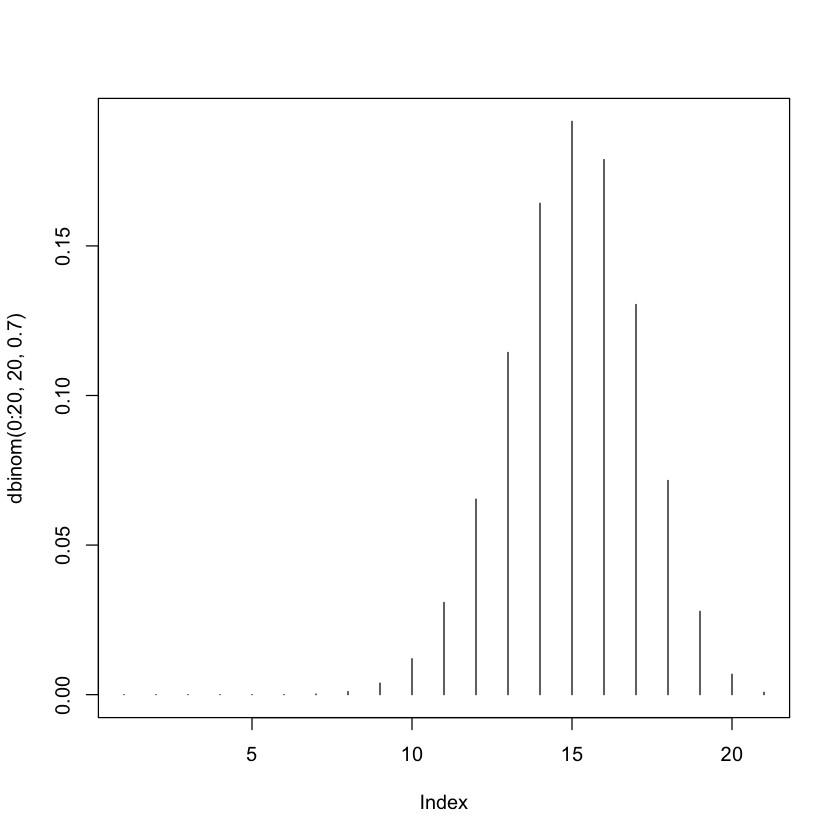

In [5]:
dbinom(12,20,0.7)
plot(dbinom(0:20,20,0.7),type = "h")
#left skewed 

### 7. A study has shown that 10 in 250 people are infected with a common cold virus, however, the gold standard tests although accurate are not 100% perfect, where in fact if a person has the virus the probability of testing positive is 90%.

#### <br><br> <font color=blue>What the the probability that a person chosen at random has the virus and tests positive?</font>

In [6]:
1/25 * 0.9 #Intersection (multiplication rule)

[1] 0.036

### 8. In an Italian gambling game, a win is when I get at least 11 when three six-sided dice are thrown. Run a 100000 trial simulation of the above game to answer the following questions: 

<br><br> <font color=blue> 1. Would I, in the long run win the game? 
<font color=blue><br> 2. Which is more likely when throwing three dice: an 11 or a 12? 
<font color=blue><br> 3. What is the probability of getting a sum no greater than 7 or no less then 15 when throwing three dice </font>

In [11]:
my.dice.sum <- function(n.dice, n.sides){
  dice <- sample(1:n.sides, size = n.dice, replace = TRUE)
  return(sum(dice))
}

passadieci <- replicate(100000, my.dice.sum(n.dice = 3, n.sides = 6))
sum(passadieci >= 11)/length(passadieci)


#1. 0.49953 No ##Altough sometimes the prob is > 0.5 so in that case yes

sum(passadieci == 11)/length(passadieci)

#2.  11 = 0.12391
sum(passadieci == 12)/length(passadieci)

#    12 = 0.11571

sum((passadieci <= 7) | (passadieci >= 15))/length(passadieci)

#3. 0.25415

[1] 0.49968

[1] 0.12511

[1] 0.11505

[1] 0.25521

### 9. In a company 3/4 of the females are single, 

### <br><br> <font color=blue> Calculate the probability that within the first 5 randomly selected females we find the first single woman? <br> <font color=blue> In average in how many people we need to select before find a single female?</font>

In [13]:
#1
pgeom(4,0.75) 

sum(dgeom(0:4,0.75)) #= 0.9990234

#2
#1/p 
1/0.75 
#1.33

[1] 0.9990234

[1] 0.9990234

[1] 1.333333

### 10. Lets use a mouse random walk The Closed Maze, where a mouse always start on the first chamber and can move randomly to different chambers until it finds a cheese in chambers 7 or 9. From the following diagram calculate:

![title](Mouse_random.png)

<br><br> <font color=blue> 1. The transition matrix
<br> <font color=blue>2. Write a function that simulates this random walk (5000 times ) the mouse starts always from the 1st chamber, 
<br> <font color=blue>3. Plot the mouse random walk simulation using **ONE** of the following vector (steps - N) sizes (10,15, 50,100), 
<br><font color=blue>4. what are the probabilities of finishing in each chamber at each one of these steps sizes?  (table of 4 rows (vector size -N) vs 9 columns (chambers))<br> 


[1] 9


   7    9 
2934 2066 

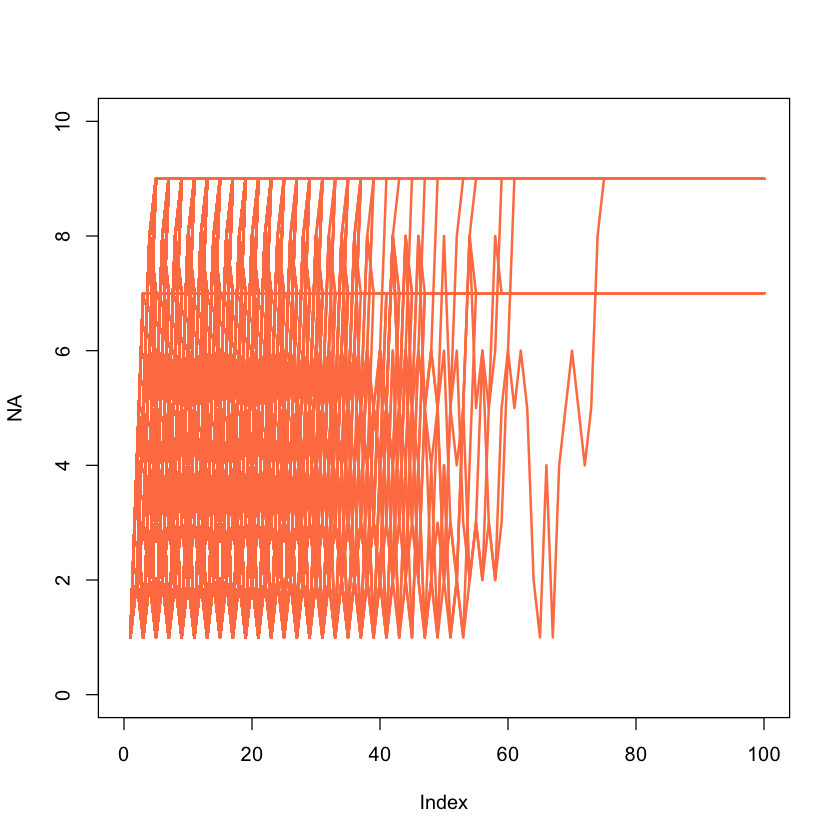

In [14]:
###Random walk mouse
P=matrix(0,9,9)

P[1,]=c(0,0.5,0,0.5,0,0,0,0,0)
P[2,]=c(1/3,0,1/3,0,1/3,0,0,0,0)
P[3,]=c(0,0.5,0,0,0,0.5,0,0,0)
P[4,]=c(1/3,0,0,0,1/3,0,1/3,0,0)
P[5,]=c(0,1/4,0,1/4,0,1/4,0,1/4,0)
P[6,]=c(0,0,1/3,0,1/3,0,0,0,1/3)
P[7,]=c(0,0,0,0,0,0,1,0,0)
P[8,]=c(0,0,0,0,1/3,0,1/3,0,1/3)
P[9,]=c(0,0,0,0,0,0,0,0,1)

P0 = c(1,0,0,0,0,0,0,0,0)

Markov2 = function(N, Pi0, P){
  s = length(Pi0)
  X=matrix(0,1,N)
  a = 1
  X[1]=a
  for (i in 2:N) {
    a=sample(c(1:9),1,replace=T, P[a,])
    X[i]=a
  }
  b = as.vector(X)
  return(b)
}

a = Markov2(15,P0,P)
a[15]

N=100
plot(NA, xlim=c(0,N), ylim=c(0,10))#empty plot
datas = matrix(ncol = N, nrow = 5000)
for (i in 1:5000){
  datas[i,] = Markov2(N,P0,P)
  condir = datas[i,]
  col = (condir[N]>=7 & condir[N]!=8)
  lines(condir, lwd=2,col = ifelse(col, "coral","black"))
}

datas.df = as.data.frame(datas)
table(datas.df$V100)
